# Support vector machine(SVM) model

<img src='https://user-images.githubusercontent.com/127171630/226094507-5ccb8dab-643c-4ee9-bec0-7fff963bb64b.png'>

## SVM 이란?

* Fig.a, b 와 같이 데이터 분류를 위한 __결정경계(Decision Boundary)를 정의 하는 모델__ 로, 분류 카테고리(클래스)가 2개일 땐 선으로, 3개로 늘어나면 3차원으로 (이때의 결정 경계는 __평면__) 정의함. 속성의 개수가 늘어날수록 고차원으로 분류하는데 이를 __초평면__ 이라 함.
* SVM에서 SV(__support vector__)는 결정경계와 가까이 있는 데이터 포인터들을 의미함.
* 최적의 결정경계는 Fig.c의 Graph F처럼 데이터 군으로부터 멀리 떨어져서 생성된게 좋음. 즉, 최적의 결정경계는 __Margin을 최대화__ 함.

## Margin 이란?

- __결정결계와 서포트 벡터 사이의 거리__
- Fig.d에서 실선이 결정경계, 실선 위 혹은 내에 존재하는 점이 support vector
- __마진의 크기를 최대화하기 위해서는 이상치(outlier)를 잘 다루는게 중요함.__
* Hard margin vs Soft margin
    - Hard margin : 이상치 허용 기준을 까다롭게 세운것으로 서포트 벡터와 결정경계의 사이 거리가 매우 좁음. 이경우 __오버피팅__ 문제가 발생할 수 있음.
    - Soft margin : 이상치가 마진안에 어느정도 포함되도록 기준을 세운것으로, 서포트 벡터와 결정경계 사이의 거리가 멀어짐. 이경우 __언더피팅__ 문제가 발생할 수 있음.

## 장점

1. 고차원 데이터 처리에 효과적
2. 차원수가 샘플수보다 큰 경우에도 효과적
3. 결정경계를 정의하는게 서포트 벡터이기 때문에 데이터 포인트 중 서포트 벡터만 잘 골라내면 나머지 수많은 데이터 포인트를 무시할 수 있기 때문에 __매우 빠르다__
4. 결정경계에 대해 다양한 kernel을 지정할 수 있음 (linear, polynomial, Radial Bias Function (방사기저함수 커널 혹은 가우시안 커널))

## 단점

* feature개수가 샘플데이터 수보다 훨씬 많다면, 오버피팅을 피하기 위해 kernel function을 지정하거나 정규화 과정이 필수적임.

## 학습 메커니즘

__서포트벡터__ 를 활용해 __최대 마진__ 을 갖는 __결정경계__ 를 찾는 방향으로 학습됨.

* 서포트 벡터 확인하는 코드 : classifier.support_vectors_

---

## A_ 데이터 준비

In [1]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# 평가지표 로드
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score,precision_score, recall_score, f1_score, confusion_matrix

# 학습 모델 로드
from sklearn import svm
svm_model = svm.SVC()

In [2]:
def evaluate_classifier(y_test, y_pred, roc = False):
    
    print(f"Accuracy: {accuracy_score(y_test, y_pred): .4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average = 'macro'): .4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average = 'macro'): .4f}")
    print(f"F_SCORE: {f1_score(y_test, y_pred, average = 'macro'): .4f}")
    if roc:
        print(f"ROC_AUC: {roc_auc_score(y_test, y_pred, average = 'macro', multi_class = 'ovr'): .4f}")
    print(classification_report(y_test, y_pred))

In [3]:
# 분석 데이터 로드
from sklearn.datasets import load_breast_cancer

## B. 데이터 확인

In [4]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
cancer_data = cancer.data
cancer_label = cancer.target

In [6]:
cancer_df = pd.DataFrame(data=cancer_data, columns = cancer.feature_names)

In [7]:
cancer_df["label"] = cancer.target

In [8]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


__각 feature 값들의 스케일 차이가 많이 남. 정규화 진행 필요해보임__

## C_ 데이터 시각화

### 1. heatmap

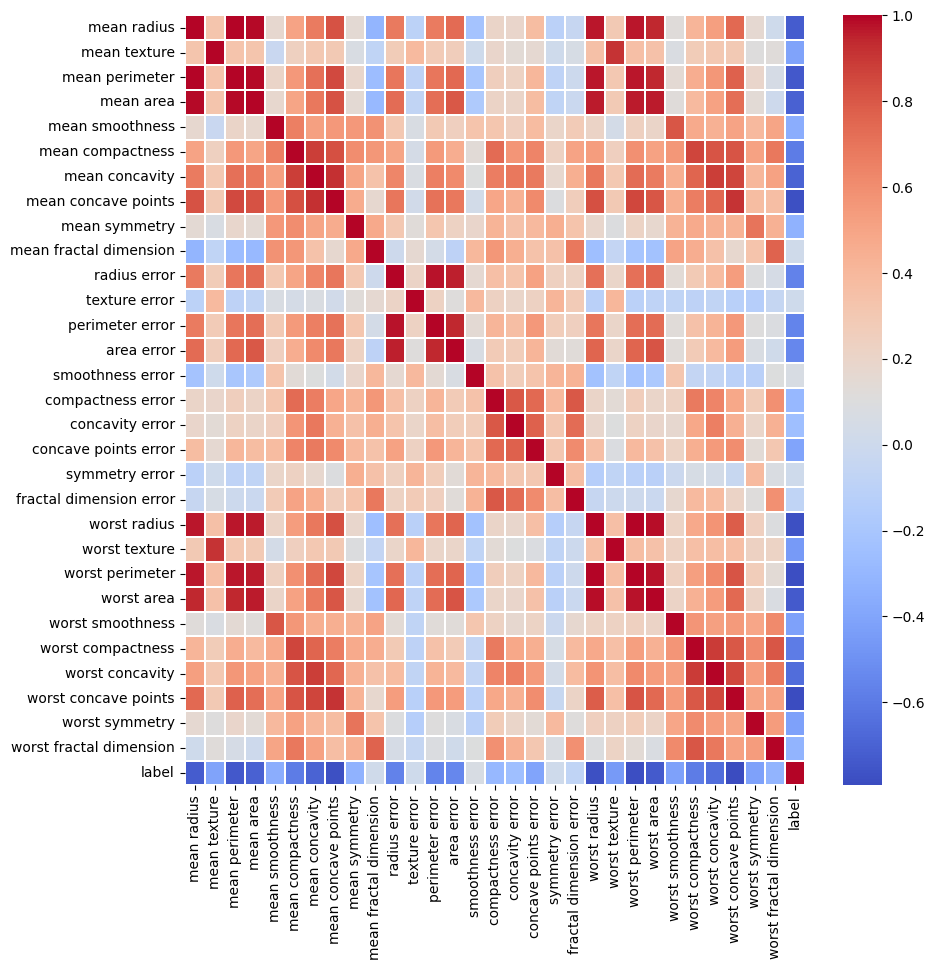

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
correlations = cancer_df[cancer_df.columns].corr(method='pearson')
sns.heatmap(correlations, annot = False, linewidths=.2, cmap='coolwarm')
plt.show()

### label값과 다른 feature들과의 음/양 상관관계를 한 눈에 보기 위해 barplot으로 다시 살펴봄

In [11]:
cancer_df2 = cancer_df.drop(['label'], axis = 1)
cancer_df2.shape

(569, 30)

__x 값에 들어갈 feature_names 지정__

In [35]:
cancer_df2.corrwith(cancer_df.label).index

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

__y 값에 들어갈 상관계수 계산__

In [36]:
cancer_df2.corrwith(cancer_df.label)

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

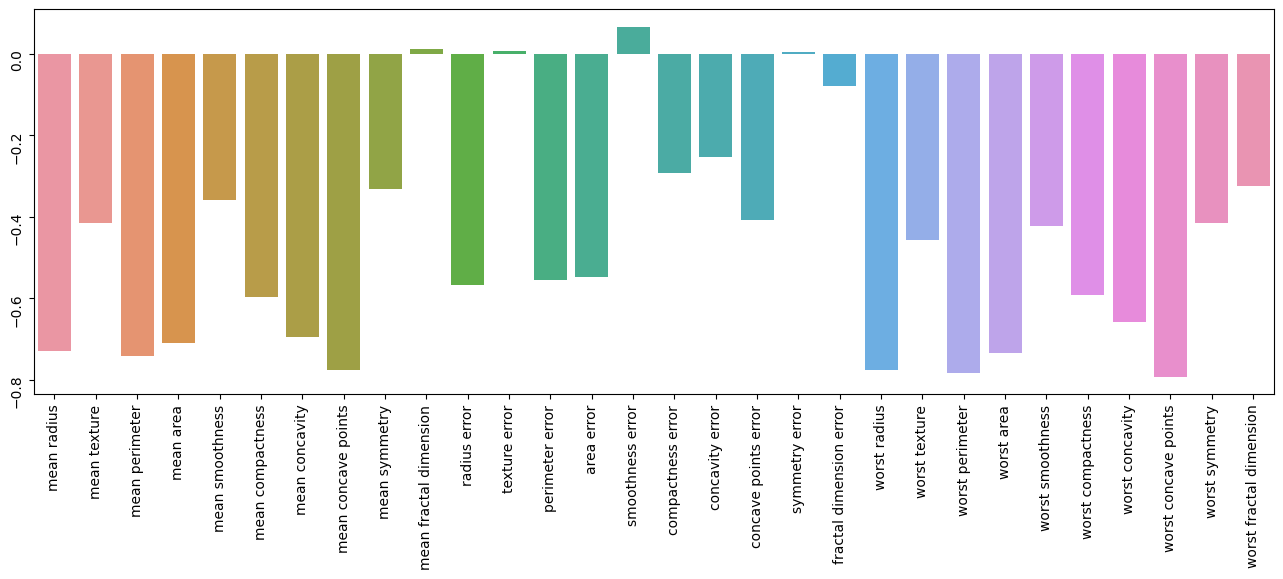

In [34]:
plt.figure(figsize=(16,5))
ax = sns.barplot(x=cancer_df2.corrwith(cancer_df.label).index, y=cancer_df2.corrwith(cancer_df.label))
ax.tick_params(labelrotation = 90)

'smoothness error' feature가 label값과 가장 강한 양의 상관관계를 가지며,  'mean factor dimension', 'texture error', 'symmetry error' 속성값들은 약한 양의 상관관계를 보임.

## C_ 데이터셋 분리 및 데이터 정규화 

__C.1 데이터셋 분리__

In [15]:
X_train, X_test, y_train, y_test = train_test_split(cancer_data, cancer_label, test_size = 0.2, random_state = 4)

In [16]:
X_train.shape, y_train.shape

((455, 30), (455,))

In [17]:
X_test.shape, y_test.shape

((114, 30), (114,))

__C.2 train, test 데이터 각각 정규화__

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# training data 정규화 및 scaling parameter(매개변수) 학습. 즉, 각 features의 평균과 분산값 도출
# 도출된 평균, 분산은 test data를 scaling할때 사용됨. 
X_train_sc = sc.fit_transform(X_train)

# train data와 같은 방식으로 정규화 시키기위해 transform() 메서드 사용
X_test_sc = sc.transform(X_test) 

__C.3 시각화__

In [53]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'worst area')

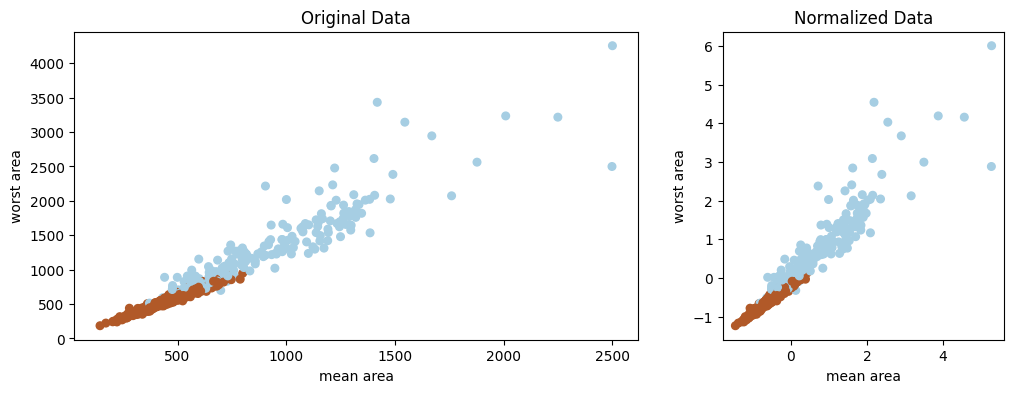

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(12,4), gridspec_kw={'width_ratios': [2,1]})

axs[0].scatter(X_train[:, 3], X_train[:, -7], c=y_train, s=30, cmap=plt.cm.Paired)
axs[0].set_title('Original Data')
axs[0].set_xlabel('mean area')
axs[0].set_ylabel('worst area')

axs[1].scatter(X_train_sc[:, 3], X_train_sc[:, -7],  c=y_train, s=30, cmap=plt.cm.Paired)
axs[1].set_title('Normalized Data')
axs[1].set_xlabel('mean area')
axs[1].set_ylabel('worst area')

## D_다양한 모델로 학습

### D.1_SVM

__정규화 이전 데이터로 학습__

In [56]:
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
evaluate_classifier(y_test, y_pred_svm)

Accuracy:  0.8684
Precision:  0.8394
Recall:  0.8555
F_SCORE:  0.8466
              precision    recall  f1-score   support

           0       0.76      0.82      0.79        34
           1       0.92      0.89      0.90        80

    accuracy                           0.87       114
   macro avg       0.84      0.86      0.85       114
weighted avg       0.87      0.87      0.87       114



In [57]:
confusion_matrix(y_test, y_pred_svm)

array([[28,  6],
       [ 9, 71]], dtype=int64)

In [60]:
svm_model.support_vectors_.shape

(118, 30)

__정규화 이후 데이터로 학습__

In [62]:
svm_model.fit(X_train_sc, y_train)
y_pred_svm_sc = svm_model.predict(X_test_sc)
evaluate_classifier(y_test, y_pred_svm_sc)

Accuracy:  0.9737
Precision:  0.9595
Recall:  0.9812
F_SCORE:  0.9693
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        34
           1       1.00      0.96      0.98        80

    accuracy                           0.97       114
   macro avg       0.96      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114



In [63]:
confusion_matrix(y_test, y_pred_svm_sc)

array([[34,  0],
       [ 3, 77]], dtype=int64)

In [64]:
svm_model.support_vectors_.shape

(110, 30)

__평가__
1. 정규화 이후 support vector의 개수가 118개에서 110개로 줄어들었음
2. 전체적인 평가지표의 수치가 상승됨

### D.2_Decision Tree

__정규화 이후 데이터로 학습__

In [71]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=4)

In [72]:
decision_tree.fit(X_train_sc, y_train)
y_pred_dT_sc = svm_model.predict(X_test_sc)
evaluate_classifier(y_test, y_pred_dT_sc)

Accuracy:  0.9737
Precision:  0.9595
Recall:  0.9812
F_SCORE:  0.9693
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        34
           1       1.00      0.96      0.98        80

    accuracy                           0.97       114
   macro avg       0.96      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114



In [73]:
confusion_matrix(y_test, y_pred_dT_sc)

array([[34,  0],
       [ 3, 77]], dtype=int64)

__평가__
- recall값이 많이 상승함

### D.3_Random Forest

__정규화 이후 데이터로 학습__

In [74]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=15)

In [75]:
random_forest.fit(X_train_sc, y_train)
y_pred_RF_sc = svm_model.predict(X_test_sc)
evaluate_classifier(y_test, y_pred_RF_sc)

Accuracy:  0.9737
Precision:  0.9595
Recall:  0.9812
F_SCORE:  0.9693
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        34
           1       1.00      0.96      0.98        80

    accuracy                           0.97       114
   macro avg       0.96      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114



In [76]:
confusion_matrix(y_test, y_pred_RF_sc)

array([[34,  0],
       [ 3, 77]], dtype=int64)

### D.4_SGD

__정규화 이후 데이터로 학습__

In [65]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

In [66]:
sgd_model.fit(X_train_sc, y_train)
y_pred_sgd_sc = svm_model.predict(X_test_sc)
evaluate_classifier(y_test, y_pred_sgd_sc)

Accuracy:  0.9737
Precision:  0.9595
Recall:  0.9812
F_SCORE:  0.9693
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        34
           1       1.00      0.96      0.98        80

    accuracy                           0.97       114
   macro avg       0.96      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114



In [67]:
confusion_matrix(y_test, y_pred_sgd_sc)

array([[34,  0],
       [ 3, 77]], dtype=int64)

### D.5_Logistic Regression

__정규화 이후 데이터로 학습__

In [68]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

In [69]:
logistic_model.fit(X_train_sc, y_train)
y_pred_LR_sc = svm_model.predict(X_test_sc)
evaluate_classifier(y_test, y_pred_LR_sc)

Accuracy:  0.9737
Precision:  0.9595
Recall:  0.9812
F_SCORE:  0.9693
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        34
           1       1.00      0.96      0.98        80

    accuracy                           0.97       114
   macro avg       0.96      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114



In [70]:
confusion_matrix(y_test, y_pred_LR_sc)

array([[34,  0],
       [ 3, 77]], dtype=int64)